In [183]:
#Importing libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [184]:
#Reading file, splitting train test
df = pd.read_pickle('treated_dataset.pkl')
df = pd.get_dummies(df, drop_first=True)
train = df[df.Survived!=2]
test = df[df.Survived==2]
test.drop('Survived', axis=1, inplace=True)

C:\Users\Prueba\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [185]:
#Splitting train-test the labeled dataset
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [186]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Scoring and cross validation**

In [187]:
rf.score(X_train,y_train)

0.9894894894894894

In [188]:
rf.score(X_test, y_test)

0.8116591928251121

In [191]:
cross_val_score(rf, X, y, cv=10)

array([0.76404494, 0.84269663, 0.74157303, 0.87640449, 0.88764045,
       0.83146067, 0.84269663, 0.82022472, 0.85393258, 0.79545455])

**Feature importance**

<AxesSubplot:xlabel='importance', ylabel='feature'>

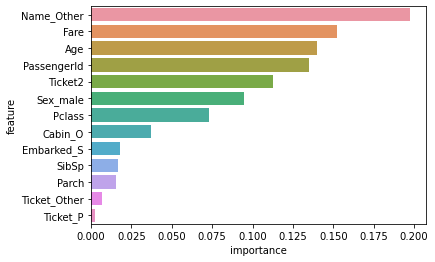

In [192]:
features = pd.DataFrame({'feature':X.columns, 'importance': rf.feature_importances_})
features.sort_values('importance', ascending=False, inplace=True)
sns.barplot(y='feature', x='importance', data=features)

**Grid Search**

In [196]:
parameters = {'n_estimators': [30,50,60],
              'max_depth': [5,6,7],
              'min_samples_split': [2,3,4],
              'max_features':[5,6,7]
}

In [197]:
gs = GridSearchCV(rf, parameters)
gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [198]:
gs.best_params_

{'max_depth': 6, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 50}

In [199]:
rf = RandomForestClassifier(random_state=42, max_depth=6, max_features=6, min_samples_split=3, n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Submission**

In [200]:
predictions = rf.predict(test)

In [201]:
submission_file = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

In [202]:
submission_file.to_csv('rf_predictions.csv', index=False)

Score 0.76794